In [1]:
import sys
sys.path.insert(0,'..')

from src.models import *
from src.loss_functions import *
from src.noise import *
from src.metrics import *
from src.plotting import *
from src.generate_data import *
from src.real_data import *

import sklearn
import pandas as pd

from scipy.stats import bernoulli

from operator import xor

import os


In [2]:
def load_abstain(dataset, model_type, noise_type, epsilon=0.1, fixed_class = 0, fixed_noise = 0.0):
    path = "/scratch/hdd001/home/snagaraj/results/abstain/"
    
    if noise_type == "class_independent":
        file_path = os.path.join(path, dataset, model_type, noise_type ,f"{epsilon}.pkl")
    elif noise_type == "class_conditional":
        file_path = os.path.join(path, dataset, model_type, noise_type ,f"{epsilon}.pkl")
    
    with open(file_path, 'rb') as file:
            # Use pickle to write the dictionary to the file
            data = pkl.load(file)
            
    return data
    

In [3]:
dataset = "cshock_eicu"
model_type = "LR"
noise_type = "class_independent"

datasets = ["cshock_eicu", "cshock_mimic", "saps", "support", "lungcancer"]


dfs = []
for dataset in datasets:
    data = load_abstain(dataset, model_type, noise_type)
    data["Dataset"] = dataset
    dfs.append(data)
    
    
df = pd.concat(dfs) 
#df["Threshold"] = df["Threshold"].round()
#df["Coverage"] = df["Coverage"].round()
#df["Regret"] = df["Regret"].round()

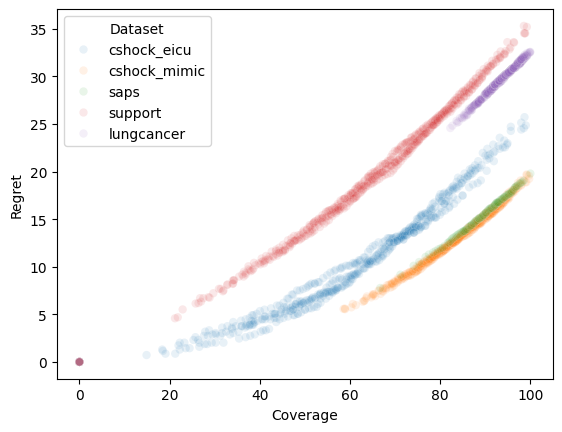

In [4]:

# Create the line plot
sns.scatterplot(x='Coverage', y='Regret', hue = "Dataset",  data=df[df["Noise Level"] == 0.2], alpha = 0.1)

# Show the plot
plt.show()

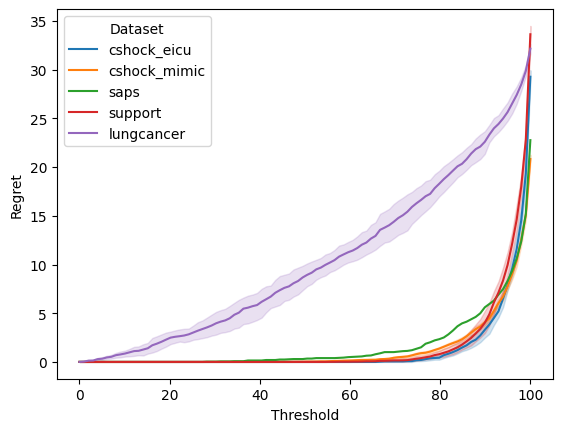

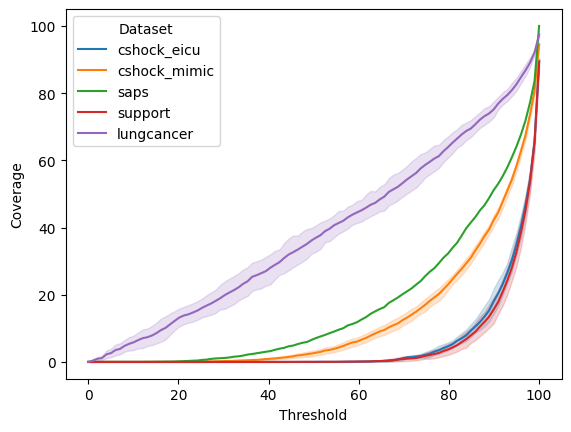

In [5]:

# Create the line plot
sns.lineplot(x='Threshold', y='Regret', hue = "Dataset", err_style='band', data=df[df["Noise Level"] == 0.4])

# Show the plot
plt.show()

# Create the line plot
sns.lineplot(x='Threshold', y='Coverage', hue = "Dataset", err_style='band', data=df[df["Noise Level"] == 0.4])

# Show the plot
plt.show()

